%%HTML
<h3 align="center">Министерство науки и высшего образования Российской Федерации</h3>
<h3 align="center"> Федеральное государственное бюджетное образовательное учреждение высшего образования </h3>
<h3 align="center"> Уфимский государственный нефтяной технический университет </h3>
<h3 align="center"> “Высшая школа информационных и социальных технологий” </h3>
<h3 align="center"> Кафедра “Информационные технологии и прикладная математика” </h3>
<br>
<br>
<br>
<h3 align="center"> Отчет </h3>
<h3 align="center"> по лабораторной работе №3 </h3>
<br>
<br>
<br>
<h3 align="right"> Выполнил: </h3>
<h3 align="right"> Ст-гр: БНИ-21-01 Салиев Альберт Русланович </h3>
<h3 align="right"> Проверил: </h3>
<h3 align="right"> Гумерова Велена Ильгизовна </h3>
<h3 align="right"> Дата: 25.04.2024 </h3>
<br>
<br>
<br>
<h3 align="center"> Уфа 2024 </h3>
<br>
<br>

%%HTML

<h3 align="left"> Подключены библиотеки</h3>


</h3>

In [1]:
library(tidyr)
library(dplyr)
library(plotly)

library(caret) #confusion matrix, splitting data
library(glmnet)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

Loading required package: lattice
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand

Loading required package: foreach
Loaded glmnet 2.0-16



%%HTML

<h3 align="left"> Подготовлен датафрейм</h3>

</h3>

In [2]:
D <- read.csv("BankChurners.csv")
D <- as.data.frame(D)

In [3]:
dim(D)
names(D)

[1] 10127    23

[1] "CLIENTNUM"                                                                                                                         
 [2] "Attrition_Flag"                                                                                                                    
 [3] "Customer_Age"                                                                                                                      
 [4] "Gender"                                                                                                                            
 [5] "Dependent_count"                                                                                                                   
 [6] "Education_Level"                                                                                                                   
 [7] "Marital_Status"                                                                                                                    
 [8] "Income_Category"                                                                                                                   
 [9] "Card_Category"                                                                                                                     
[10] "Months_on_book"                                                                                                                    
[11] "Total_Relationship_Count"                                                                                                          
[12] "Months_Inactive_12_mon"                                                                                                            
[13] "Contacts_Count_12_mon"                                                                                                             
[14] "Credit_Limit"                                                                                                                      
[15] "Total_Revolving_Bal"                                                                                                               
[16] "Avg_Open_To_Buy"                                                                                                                   
[17] "Total_Amt_Chng_Q4_Q1"                                                                                                              
[18] "Total_Trans_Amt"                                                                                                                   
[19] "Total_Trans_Ct"                                                                                                                    
[20] "Total_Ct_Chng_Q4_Q1"                                                                                                               
[21] "Avg_Utilization_Ratio"                                                                                                             
[22] "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"
[23] "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"

In [4]:
D <- subset(D, select = -c(CLIENTNUM))
D <- subset(D, select = -c(Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1))
D <- subset(D, select = -c(Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2))

%%HTML

<h3 align="left"> Для линейной регрессии необходимо, чтобы данные были нормально распределены</h3>
<h3 align="left"> Использована гистограмма для проверки соответствия нормальному распределению</h3>

</h3>

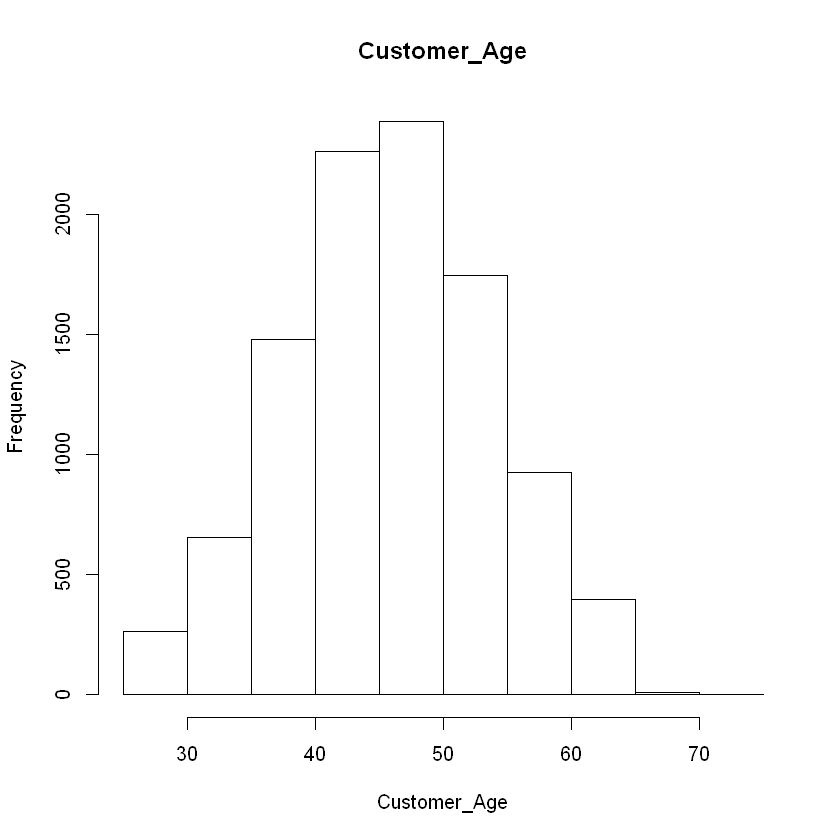

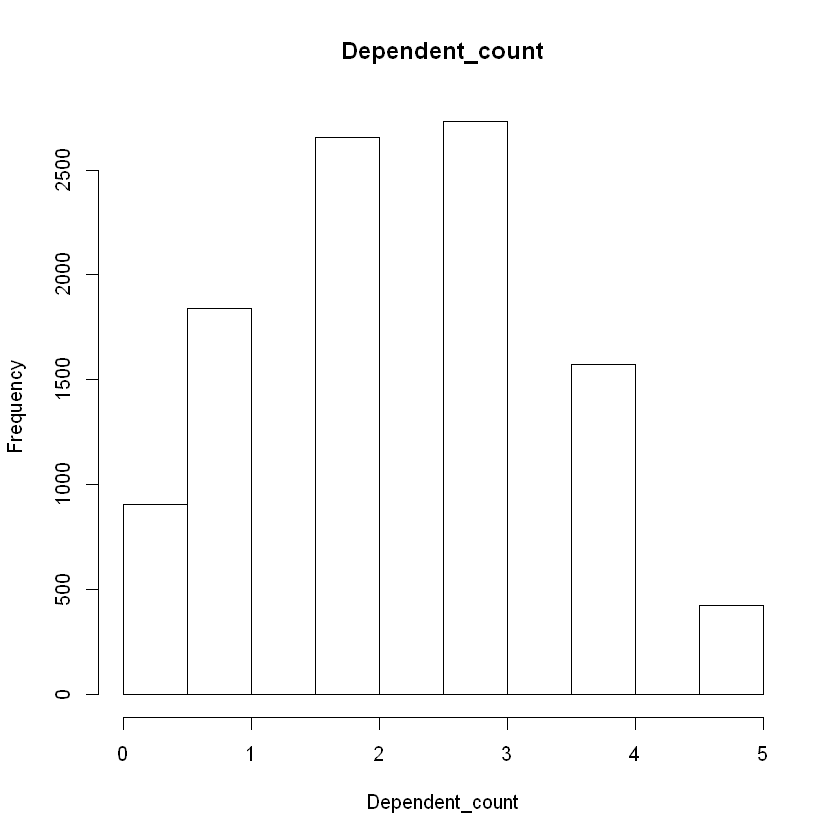

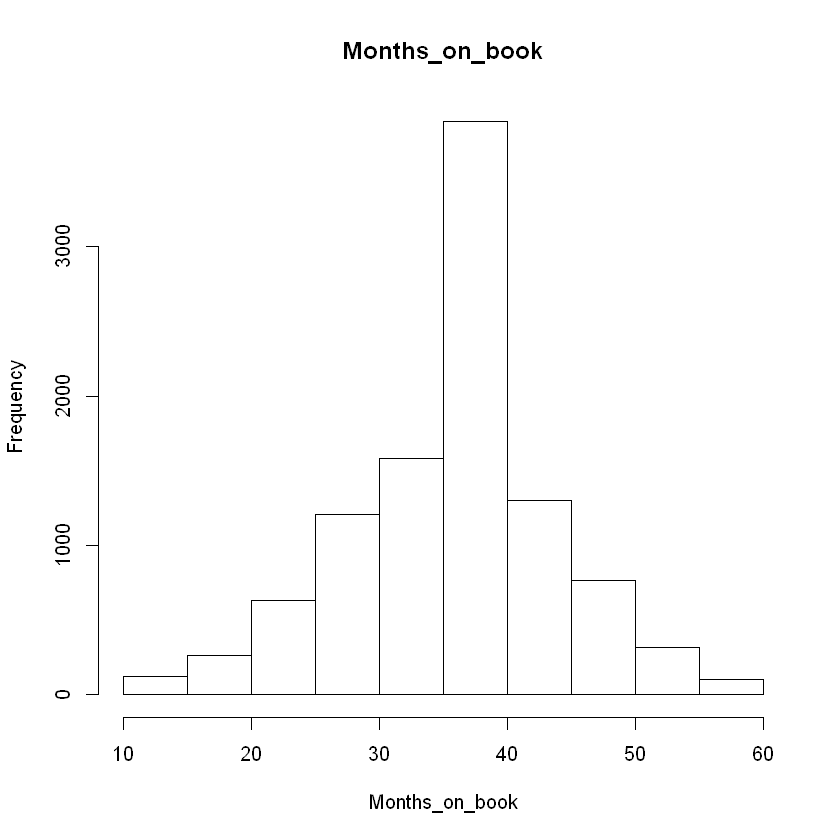

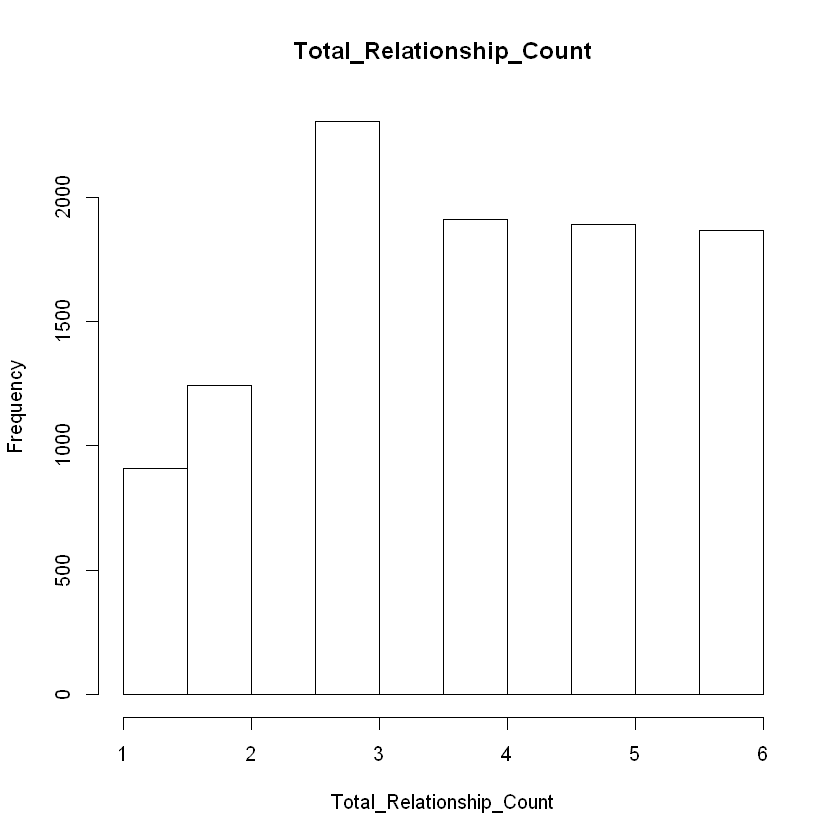

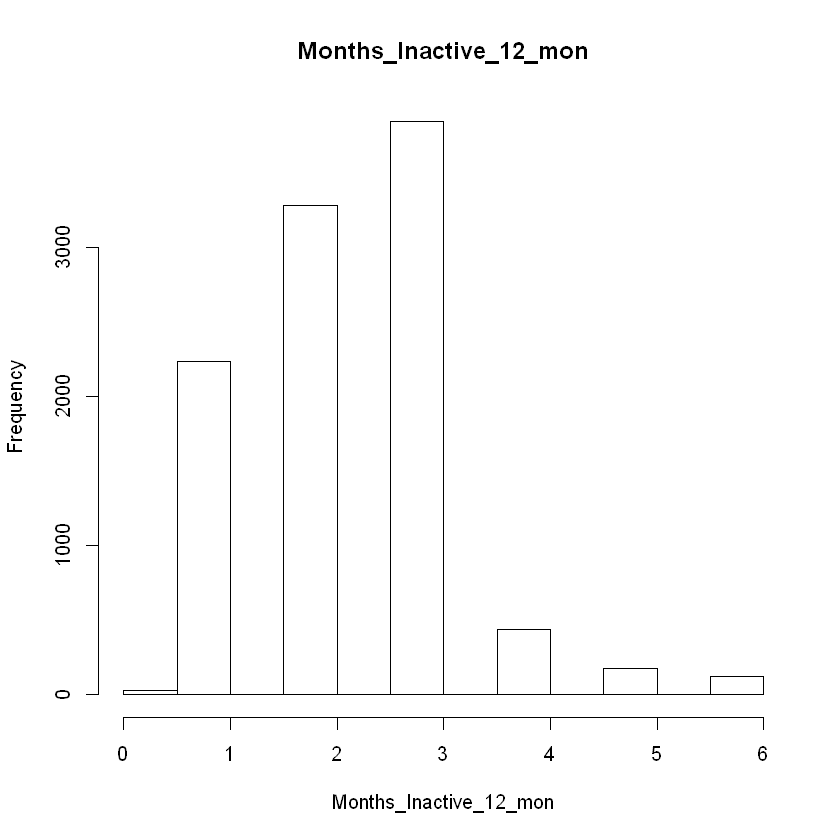

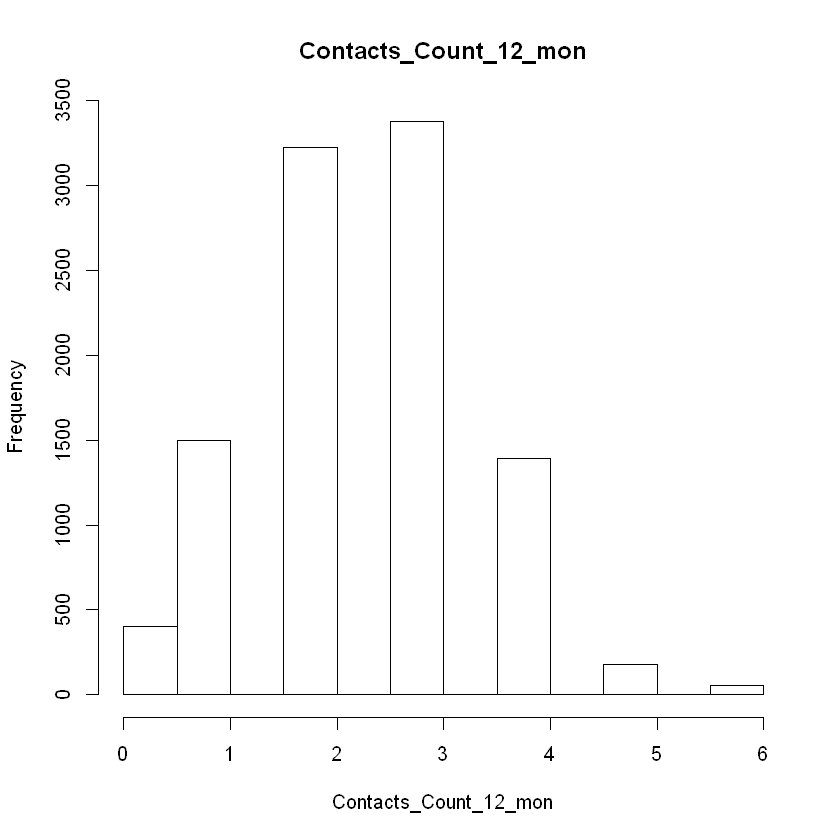

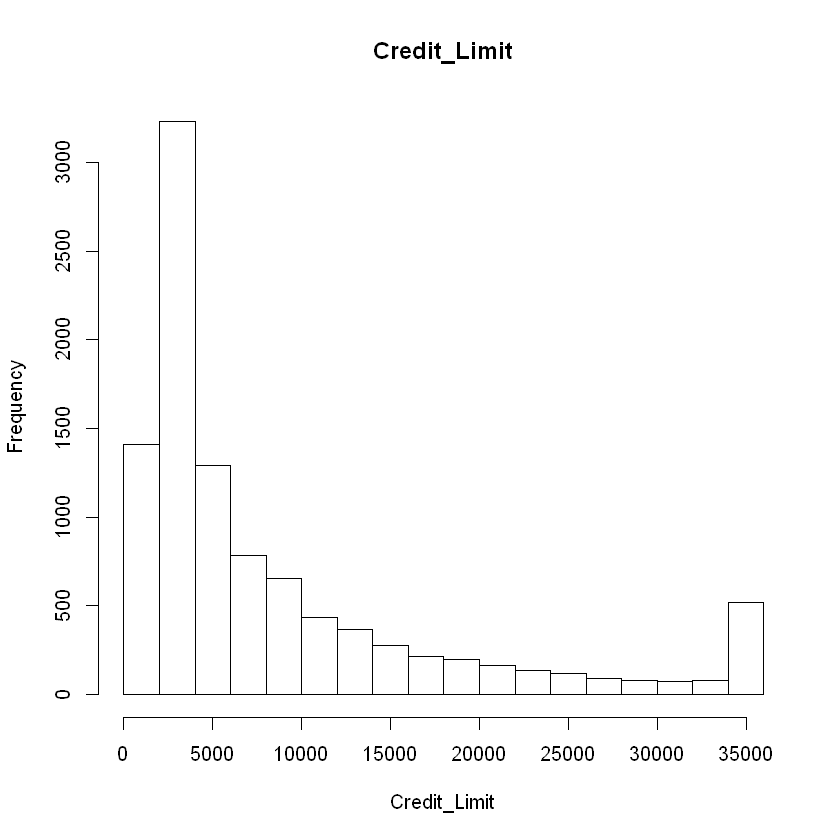

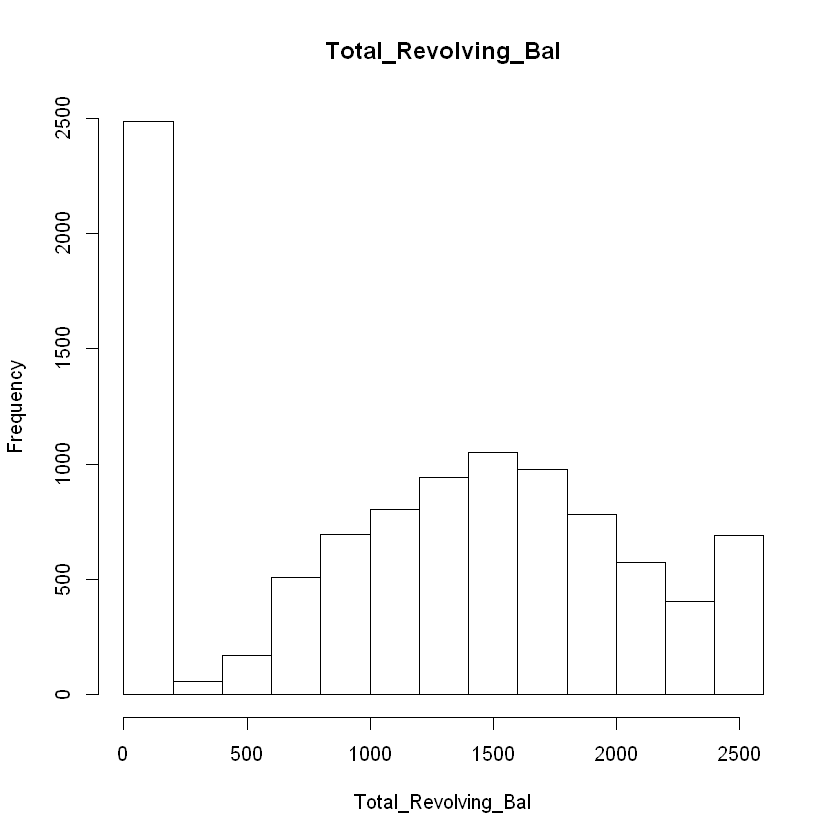

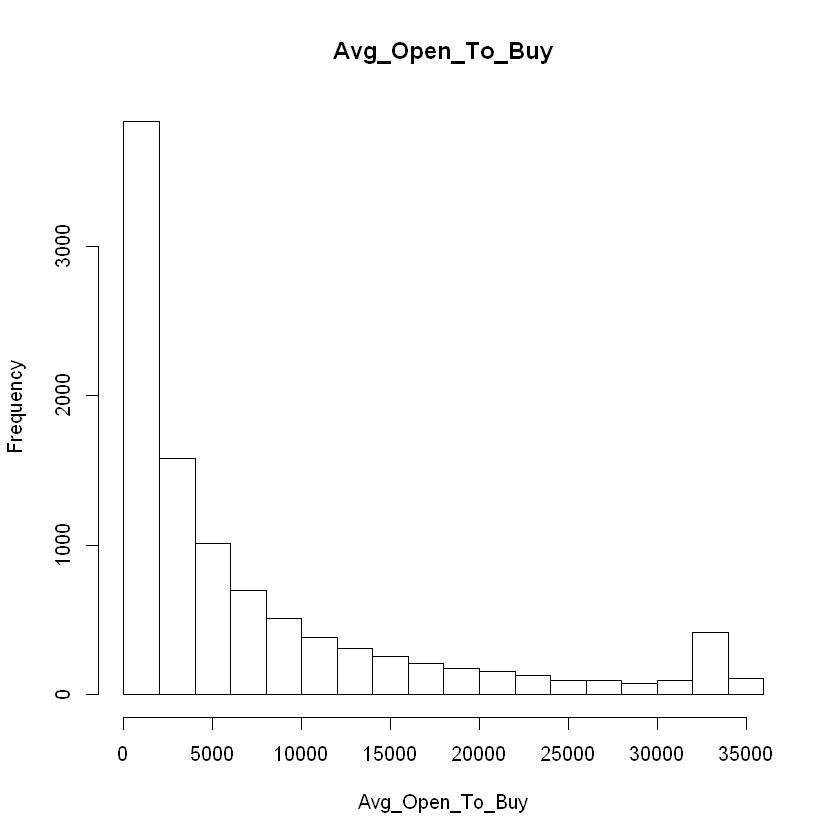

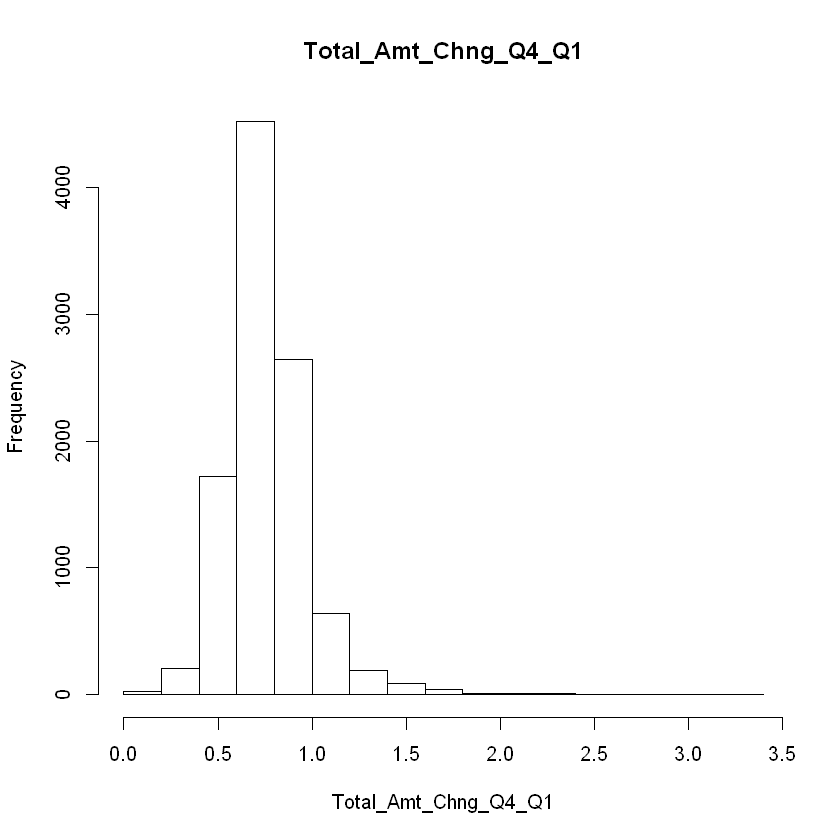

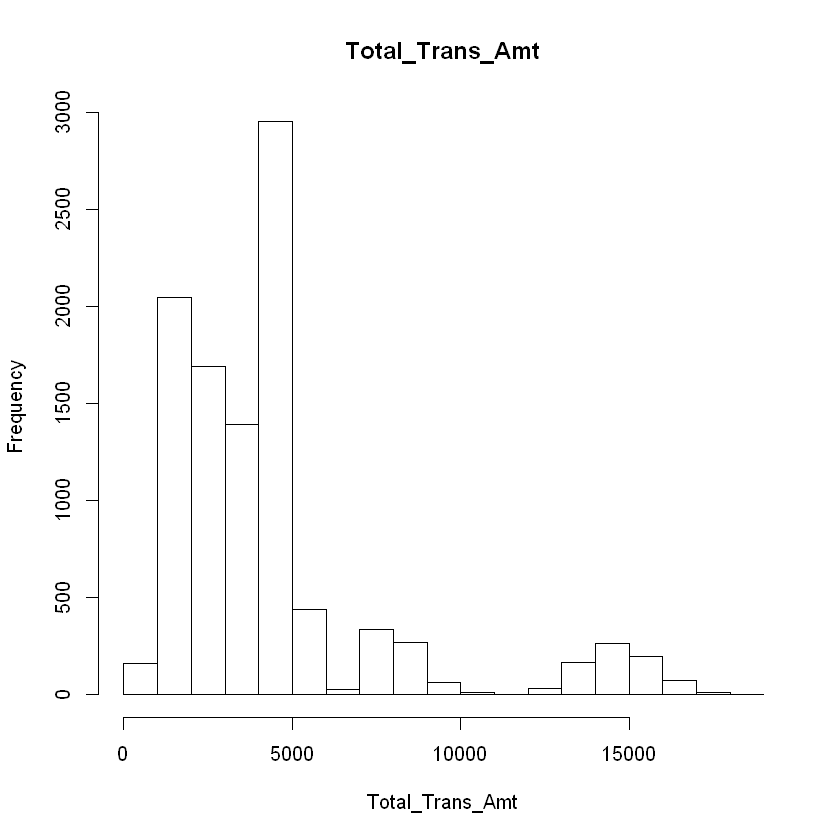

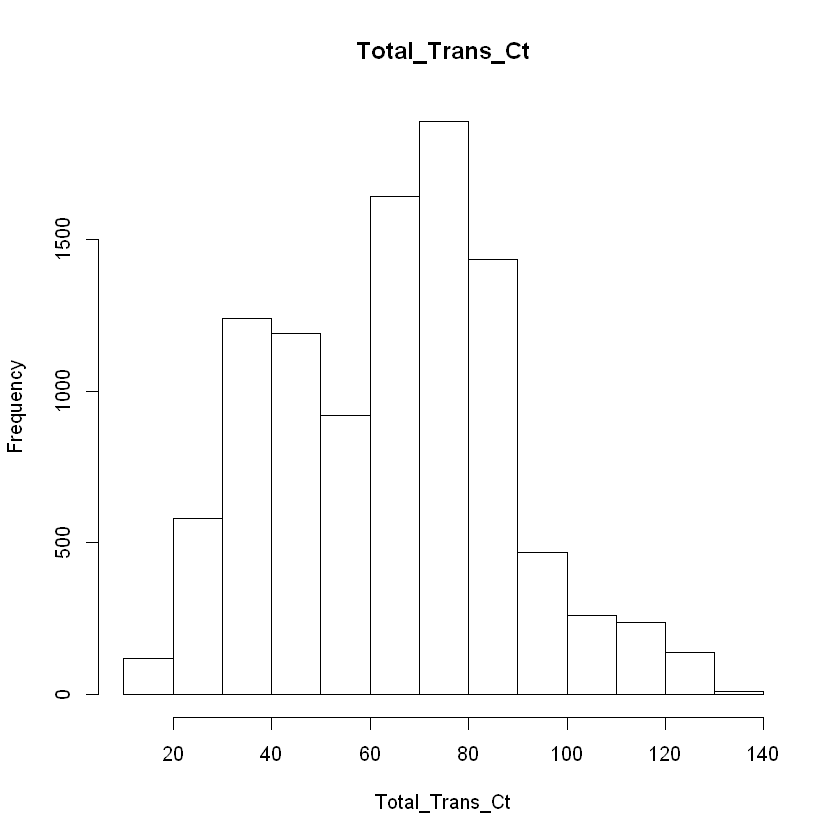

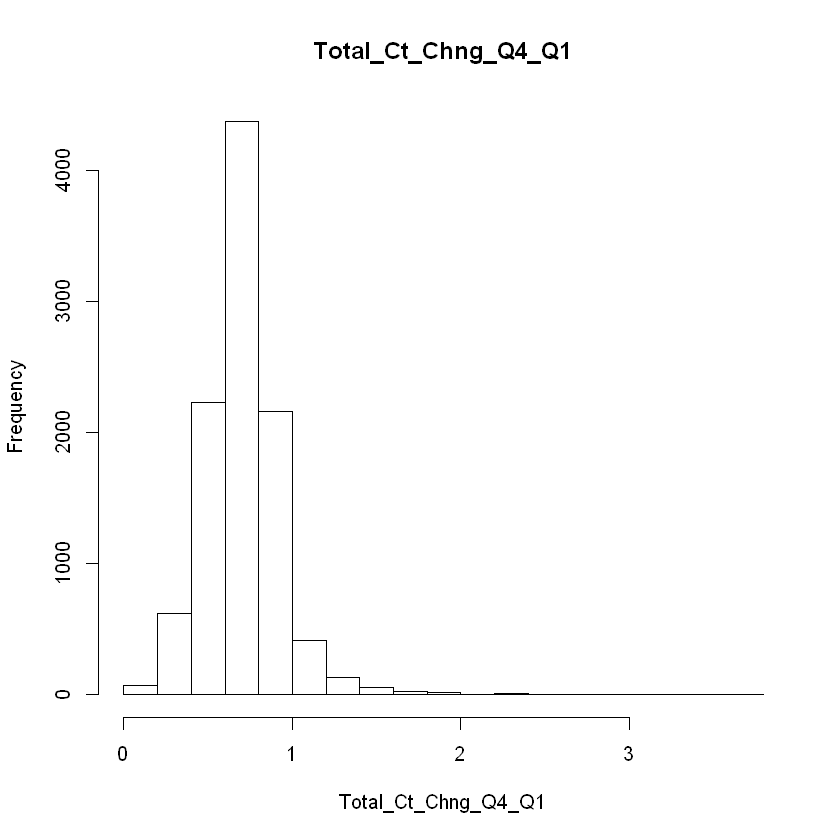

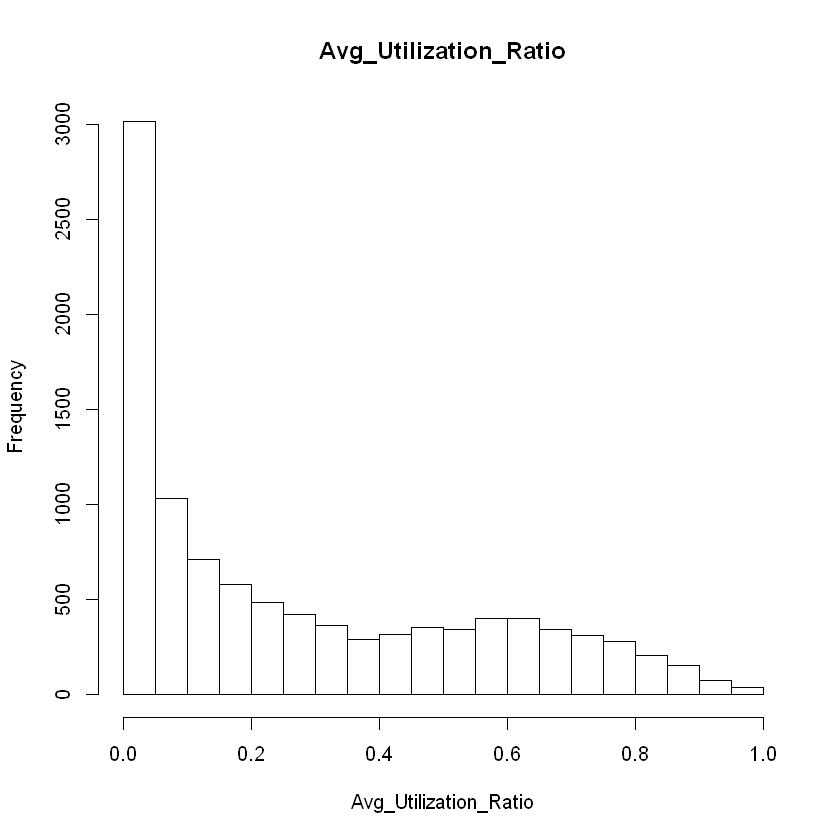

In [5]:
for (col in colnames(D)) {
  if (is.numeric(D[[col]])) {
    hist(D[[col]], main = col, xlab = col)
  }
}

%%HTML

<h3 align="left"> Подготовим данные для работы </h3>


</h3>

In [6]:
# Произвдена нормализаиця 
cols <- sapply(D, is.numeric)
D[cols] <- scale(D[cols])

# Для наилучшего предсказания избавимся от выбросов

outliers <- function(x) {

  Q1 <- quantile(x, probs=.25)
  Q3 <- quantile(x, probs=.75)
  iqr = Q3-Q1

 upper_limit = Q3 + (iqr*1.5)
 lower_limit = Q1 - (iqr*1.5)

 x > upper_limit | x < lower_limit
}

remove_outliers <- function(df, cols = names(df)) {
  for (col in cols) {
    df <- df[!outliers(df[[col]]),]
  }
  df
}

remove_outliers(D, c('Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                     'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'))


# Категориальные переменные приведем к количественным

D$Attrition_Flag <- as.integer(factor(D$Attrition_Flag))

D$Gender <- as.integer(factor(D$Gender))

D$Education_Level <- as.integer(factor(D$Education_Level))
D$Marital_Status <- as.integer(factor(D$Marital_Status))
D$Income_Category <- as.integer(factor(D$Income_Category))
D$Card_Category <- as.integer(factor(D$Card_Category))

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
11,Existing Customer,-0.53961091,M,2.0430978,Uneducated,Unknown,$120K +,Blue,-0.61709896,0.7639049,0.6519080,-0.4115957,-0.2072835,0.373240080,-0.24070128,0.324165839,-0.9428803,-0.9738471,-0.135339178,-0.209993991
15,Existing Customer,1.33145657,F,-0.2665340,Graduate,Married,Less than $40K,Blue,1.51151534,0.7639049,-0.3375813,-0.4115957,-0.6817148,-0.592419097,-0.62846083,1.961888986,-0.8342592,-1.5276850,-0.425150311,0.014895086
20,Existing Customer,-0.16539741,F,-0.2665340,Graduate,Married,Unknown,Blue,0.13417668,1.4072367,-1.3270705,-0.4115957,0.6423358,-0.007133929,0.64284046,0.940022733,-0.9411141,-1.8685084,0.826497773,-0.706926306
22,Attrited Customer,1.95514573,F,-1.8062885,Graduate,Married,Less than $40K,Blue,1.63672795,-1.1660905,0.6519080,0.4923795,-0.7914876,-1.426787891,-0.66340869,1.309536869,-1.0927127,-2.0815230,-0.471352086,-0.997105760
24,Existing Customer,0.08407825,F,1.2732205,Unknown,Single,Less than $40K,Blue,0.00896407,-0.5227587,0.6519080,-0.4115957,-0.6755534,0.487352283,-0.71910306,-0.852805113,-0.9649578,-1.7833025,-1.508791941,1.273548467
25,Existing Customer,0.95724307,M,-0.2665340,Unknown,Married,$80K - $120K,Blue,0.76023971,0.1205731,-0.3375813,0.4923795,0.3944476,-1.426787891,0.52227750,1.437270151,-0.9696676,-1.8685084,0.158672117,-0.997105760
26,Existing Customer,-0.66434874,F,0.5033433,Graduate,Single,Less than $40K,Blue,-0.99273678,1.4072367,-1.3270705,-0.4115957,-0.0950572,0.621096693,-0.15071907,0.169061140,-0.9870352,-1.8259055,0.507285510,-0.217248477
35,Existing Customer,1.45619440,M,-1.8062885,Graduate,Married,$80K - $120K,Blue,1.63672795,1.4072367,-0.3375813,-0.4115957,0.4316363,0.654226042,0.37289382,-1.099147871,-0.9163874,-1.7406996,0.007466308,-0.507427931
36,Existing Customer,1.08198090,F,-1.0364112,College,Single,Less than $40K,Blue,0.00896407,0.1205731,-0.3375813,-1.3155708,-0.5624468,0.921714861,-0.64496124,-1.140204997,-0.8822409,-0.9312442,-0.962770965,0.976114527
45,Existing Customer,-1.03856224,F,1.2732205,Graduate,Single,Unknown,Blue,-0.99273678,-1.1660905,0.6519080,0.4923795,0.1318160,1.094723685,0.03364547,0.990203665,-0.9896845,-1.7833025,0.860099063,-0.239011936


%%HTML

<h3 align="left"> Проверина корреляция с Attrition_Flag  </h3>


</h3>

In [7]:
data_cor <- cor(D[ , colnames(D) != "Attrition_Flag"], D$Attrition_Flag)

names = rownames(data_cor)
abs_cor = abs(data_cor)
data = data.frame(abs_cor = abs_cor,correlation = data_cor)
data[order(data$abs_cor,decreasing = TRUE),]

,abs_cor,correlation
Total_Trans_Ct,0.3714027012,0.3714027012
Total_Ct_Chng_Q4_Q1,0.2900540069,0.2900540069
Total_Revolving_Bal,0.2630528831,0.2630528831
Contacts_Count_12_mon,0.2044905100,-0.2044905100
Avg_Utilization_Ratio,0.1784103316,0.1784103316
Total_Trans_Amt,0.1685983814,0.1685983814
Months_Inactive_12_mon,0.1524488063,-0.1524488063
Total_Relationship_Count,0.1500052280,0.1500052280
Total_Amt_Chng_Q4_Q1,0.1310628478,0.1310628478
Gender,0.0372716957,0.0372716957


%%HTML

<h3 align="left"> Линейная регрессия</h3>
<h3 align="left"> От одного показателя</h3>

</h3>

In [24]:
fit <- lm(D$Attrition_Flag ~ Dependent_count, data = D )

fit$coefficients

(Intercept) Dependent_count 
    1.839340377    -0.006974009

In [25]:
summary(fit)$coefficients
summary(fit)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.839340377,0.003648771,504.098631,0.00000000
Dependent_count,-0.006974009,0.003648951,-1.911237,0.05600239



Call:
lm(formula = D$Attrition_Flag ~ Dependent_count, data = D)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8519  0.1534  0.1588  0.1642  0.1749 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.839340   0.003649 504.099   <2e-16 ***
Dependent_count -0.006974   0.003649  -1.911    0.056 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3672 on 10125 degrees of freedom
Multiple R-squared:  0.0003606,	Adjusted R-squared:  0.0002619 
F-statistic: 3.653 on 1 and 10125 DF,  p-value: 0.056


%%HTML
<h3 align="left"> Так как p-value < 0.05 говорит о значимости модели </h3>

<h3 align="left"> Полиноминальная регрессия</h3>
<h3 align="left"> В зависимости от нескольки показателей</h3>

</h3>

In [22]:
fit <- lm(D$Attrition_Flag ~ Months_on_book + Dependent_count + Customer_Age, data = D )
fit$coefficients

(Intercept)  Months_on_book Dependent_count    Customer_Age 
   1.8393403772    0.0005168124   -0.0079059980   -0.0080590842

In [23]:
summary(fit)$coefficients

summary(fit)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.8393403772,0.003648349,504.15688369,0.00000000
Months_on_book,0.0005168124,0.005937689,0.08703931,0.93064199
Dependent_count,-0.0079059980,0.003676321,-2.15051923,0.03153777
Customer_Age,-0.0080590842,0.005950707,-1.35430693,0.17566871



Call:
lm(formula = D$Attrition_Flag ~ Months_on_book + Dependent_count + 
    Customer_Age, data = D)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8730  0.1472  0.1597  0.1663  0.1878 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.8393404  0.0036483 504.157   <2e-16 ***
Months_on_book   0.0005168  0.0059377   0.087   0.9306    
Dependent_count -0.0079060  0.0036763  -2.151   0.0315 *  
Customer_Age    -0.0080591  0.0059507  -1.354   0.1757    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3671 on 10123 degrees of freedom
Multiple R-squared:  0.0007891,	Adjusted R-squared:  0.0004929 
F-statistic: 2.665 on 3 and 10123 DF,  p-value: 0.0462


%%HTML
<h3 align="left"> Регуляризация коэффициентов (L1, L2) </h3>

</h3>

In [10]:
# Разделение данных на тренировочную и тестовую выборку
set.seed(123)

sample <- sample(c(TRUE, FALSE), nrow(D), replace=TRUE, prob=c(0.8,0.2))
train <- D[sample, ]
test <- D[!sample, ]

In [11]:
Xtrain = as.matrix(train[, !names(train) %in% c("Attrition_Flag")])
ytrain = as.numeric(train$'Attrition_Flag')

Xtest = as.matrix(test[, !names(test) %in% c("Attrition_Flag")])
ytest = as.numeric(test$'Attrition_Flag')

alpha = c(0, 1, 0.25, 0.5, 0.75)
# Тренировка модели
for (i in alpha) {
  model_reg <- cv.glmnet(Xtrain, ytrain, family = "binomial", alpha = i, type.measure = "class")
  best_lambda <- model_reg$lambda.min
  
  best_reg <- glmnet(Xtrain, ytrain, family = "binomial", alpha = i)
    
  y_pred_reg <- predict(best_reg, s = best_lambda, newx = Xtest, type = "class")
    
  cm <- table(ytest, y_pred_reg)
}

%%HTML
<h3 align="left"> Для проверки точности используется confusionMatrix </h3>

</h3>

In [12]:
confusionMatrix(cm)

Confusion Matrix and Statistics

     y_pred_reg
ytest    1    2
    1  187  137
    2   40 1612
                                         
               Accuracy : 0.9104         
                 95% CI : (0.897, 0.9227)
    No Information Rate : 0.8851         
    P-Value [Acc > NIR] : 0.0001561      
                                         
                  Kappa : 0.6286         
                                         
 Mcnemar's Test P-Value : 5.362e-13      
                                         
            Sensitivity : 0.82379        
            Specificity : 0.92167        
         Pos Pred Value : 0.57716        
         Neg Pred Value : 0.97579        
             Prevalence : 0.11488        
         Detection Rate : 0.09464        
   Detection Prevalence : 0.16397        
      Balanced Accuracy : 0.87273        
                                         
       'Positive' Class : 1              
                                         